https://docs.opencv.org/master/de/d7a/tutorial_table_of_content_core.html

In [4]:
import cv2 as cv
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
#reading and displaying an image

In [6]:
img = cv.imread('starry_night.jpg')

In [7]:
if img is None:
    sys.exit("Could not read the image")

In [8]:
cv.imshow("starry night",img)

In [9]:
#k = cv.waitKey(0)

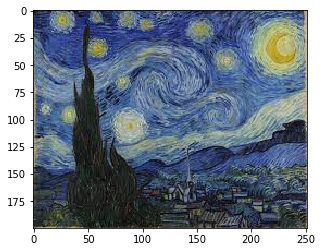

In [10]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [11]:
#mask operation

In [12]:
def is_grayscale(my_image):
    return len(my_image.shape) < 3

In [13]:
def saturated(sum_value):
    if sum_value > 255:
        sum_value = 255
    if sum_value < 0:
        sum_value = 0
    return sum_value

In [14]:
img.dtype

dtype('uint8')

In [15]:
def sharpen(my_image):
    if is_grayscale(my_image):
        height, width = my_image.shape
    else:
        my_image = cv.cvtColor(my_image, cv.CV_8U)
        height, width, n_channels = my_image.shape
    result = np.zeros(my_image.shape, my_image.dtype)
    for j in range(1, height - 1):
        for i in range(1, width - 1):
            if is_grayscale(my_image):
                sum_value = 5 * my_image[j, i] - my_image[j + 1, i] - my_image[j - 1, i] \
                            - my_image[j, i + 1] - my_image[j, i - 1]
                result[j, i] = saturated(sum_value)
            else:
                for k in range(0, n_channels):
                    sum_value = 5 * my_image[j, i, k] - my_image[j + 1, i, k]  \
                                - my_image[j - 1, i, k] - my_image[j, i + 1, k]\
                                - my_image[j, i - 1, k]
                    result[j, i, k] = saturated(sum_value)
    
    return result

In [16]:
dst0 = sharpen(img)

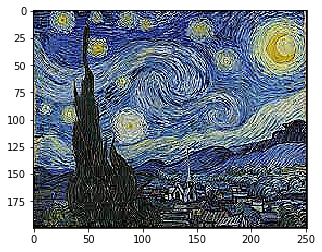

In [17]:
plt.imshow(cv.cvtColor(dst0, cv.COLOR_BGR2RGB))
plt.show()

In [18]:
dst0.shape

(200, 252, 4)

In [19]:
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]], np.float32)  # kernel should be floating point type

dst1 = cv.filter2D(img, -1, kernel)
# ddepth = -1, means destination image has depth same as input image

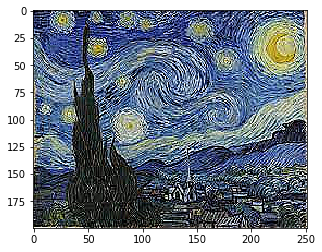

In [20]:
plt.imshow(cv.cvtColor(dst1, cv.COLOR_BGR2RGB))
plt.show()

In [21]:
#Adding 2 images

In [22]:
img.shape

(200, 252, 3)

In [23]:
img2 = cv.imread('monalisa.jpg')

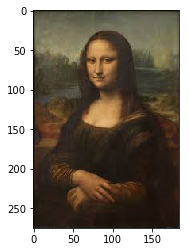

In [24]:
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.show()

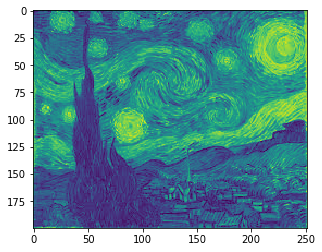

In [28]:
img3 = cv.imread('starry_night.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img3)
plt.show()

In [29]:
alpha = 0.3
beta = (1.0 - alpha)
dst = cv.addWeighted(img, alpha, img3, beta, 0.0)

error: OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\core\src\arithm.cpp:659: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


### A general image processing operator is a function that takes one or more input images and produces an output image.
Image transforms can be seen as:
Point operators (pixel transforms)
Neighborhood (area-based) operators

### Pixel transforms  include brightness and contrast adjustments as well as color correction and transformations.

In [30]:
new_image = np.zeros(img.shape, img.dtype)

In [47]:
alpha = 1.5 # Simple contrast control
beta = 0.5    # Simple brightness control

In [32]:
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        for c in range(img.shape[2]):
            new_image[y,x,c] = np.clip(alpha*img[y,x,c] + beta, 0, 255)

In [34]:
cv.imshow('Original Image', img)
cv.imshow('New Image', new_image)

In [45]:
new_image = cv.convertScaleAbs(img, alpha=alpha, beta=beta)

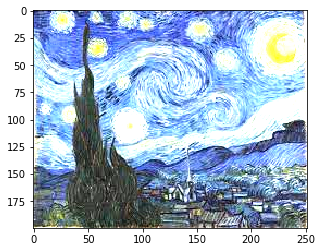

In [48]:
plt.imshow(cv.cvtColor(new_image, cv.COLOR_BGR2RGB))
plt.show()

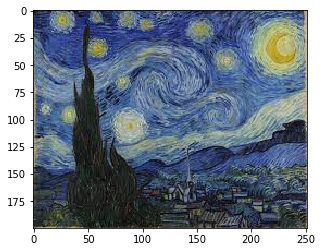

In [38]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

In [51]:
#gamma correction
# When γ<1, the original dark regions will be brighter and
# the histogram will be shifted to the right whereas it will be the opposite with γ>1.


In [52]:
gamma = 0.4
lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
res = cv.LUT(img, lookUpTable)

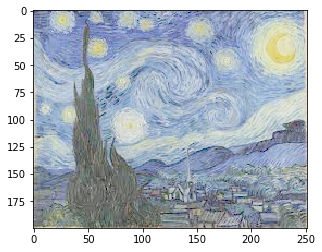

In [53]:
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()

In [54]:
# Discrete fourier transform
# https://docs.opencv.org/master/d8/d01/tutorial_discrete_fourier_transform.html

In [70]:
I = cv.imread('monalisa.jpg', cv.IMREAD_GRAYSCALE)

In [71]:
# The performance of a DFT is dependent of the image size. It tends to be the fastest for image sizes that are multiple of the numbers two, three and five. Therefore, to achieve maximal performance 
# it is generally a good idea to pad border values to the image to get a size with such traits. 

rows, cols = I.shape
m = cv.getOptimalDFTSize( rows )
n = cv.getOptimalDFTSize( cols )
padded = cv.copyMakeBorder(I, 0, m - rows, 0, n - cols, cv.BORDER_CONSTANT, value=[0, 0, 0])

In [72]:
np.float32(padded)

array([[31., 37., 46., ...,  0.,  0.,  0.],
       [39., 43., 49., ...,  0.,  0.,  0.],
       [50., 52., 55., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [73]:
planes = [np.float32(padded), np.zeros(padded.shape, np.float32)]
complexI = cv.merge(planes)   

In [74]:
complexI.shape

(288, 192, 2)

In [75]:
cv.dft(complexI, complexI) 

array([[[ 3.22003900e+06,  0.00000000e+00],
        [-2.30129219e+05, -2.64586844e+05],
        [-4.76903047e+04,  9.88881719e+04],
        ...,
        [-2.26096000e+05,  1.65262094e+05],
        [-4.76903008e+04, -9.88881719e+04],
        [-2.30129219e+05,  2.64586812e+05]],

       [[ 8.64308125e+04, -7.92990750e+05],
        [ 1.41748391e+05,  5.67270938e+04],
        [-1.21740305e+05,  7.32569641e+02],
        ...,
        [ 1.47768969e+05,  1.26905109e+05],
        [-1.97681500e+05,  2.65089570e+04],
        [ 3.10645039e+04, -5.90479688e+04]],

       [[-7.29635156e+04, -4.14328000e+05],
        [-1.96937930e+04, -4.45516211e+04],
        [ 4.53799414e+04,  2.66539375e+04],
        ...,
        [ 2.93024927e+03, -3.61108906e+04],
        [ 1.31226000e+05,  2.03156953e+05],
        [-1.42199219e+04, -1.88045219e+05]],

       ...,

       [[-3.83708812e+05,  4.55955250e+05],
        [ 1.09148852e+05, -4.13597578e+04],
        [-4.39546445e+04, -7.50475547e+04],
        ...,
     

In [76]:
cv.split(complexI, planes)                   # planes[0] = Re(DFT(I), planes[1] = Im(DFT(I))
cv.magnitude(planes[0], planes[1], planes[0])# planes[0] = magnitude
magI = planes[0]

In [77]:
matOfOnes = np.ones(magI.shape, dtype=magI.dtype)
cv.add(matOfOnes, magI, magI) #  switch to logarithmic scale
cv.log(magI, magI)

array([[14.984904 , 12.767589 , 11.606309 , ..., 12.542746 , 11.606309 ,
        12.767589 ],
       [13.589473 , 11.936093 , 11.709672 , ..., 12.179648 , 12.203329 ,
        11.108287 ],
       [12.949686 , 10.793666 , 10.871035 , ..., 10.497659 , 12.3960905,
        12.147294 ],
       ...,
       [13.2978735, 11.667562 , 11.373354 , ..., 11.02506  , 10.943365 ,
        12.149351 ],
       [12.949686 , 12.147294 , 12.3960905, ..., 10.906741 , 10.871035 ,
        10.793666 ],
       [13.589473 , 11.108287 , 12.203329 , ..., 12.199776 , 11.709672 ,
        11.936093 ]], dtype=float32)

In [78]:
magI_rows, magI_cols = magI.shape
# crop the spectrum, if it has an odd number of rows or columns
magI = magI[0:(magI_rows & -2), 0:(magI_cols & -2)]
cx = int(magI_rows/2)
cy = int(magI_cols/2)
q0 = magI[0:cx, 0:cy]         # Top-Left - Create a ROI per quadrant
q1 = magI[cx:cx+cx, 0:cy]     # Top-Right
q2 = magI[0:cx, cy:cy+cy]     # Bottom-Left
q3 = magI[cx:cx+cx, cy:cy+cy] # Bottom-Right
tmp = np.copy(q0)               # swap quadrants (Top-Left with Bottom-Right)
magI[0:cx, 0:cy] = q3
magI[cx:cx + cx, cy:cy + cy] = tmp
tmp = np.copy(q1)               # swap quadrant (Top-Right with Bottom-Left)
magI[cx:cx + cx, 0:cy] = q2
magI[0:cx, cy:cy + cy] = tmp

In [79]:
#normalize the image for visualization purposes
cv.normalize(magI, magI, 0, 1, cv.NORM_MINMAX)

array([[0.29422557, 0.30148485, 0.10708705, ..., 0.24873392, 0.10708605,
        0.3014848 ],
       [0.30306652, 0.21384948, 0.21615255, ..., 0.18234707, 0.2590167 ,
        0.25398558],
       [0.25572887, 0.26182473, 0.26011267, ..., 0.3084034 , 0.27344275,
        0.2600676 ],
       ...,
       [0.28127414, 0.26036012, 0.1849464 , ..., 0.26775724, 0.1771764 ,
        0.27142933],
       [0.25572887, 0.26006716, 0.27344272, ..., 0.27109307, 0.26011285,
        0.26182473],
       [0.30306652, 0.2539853 , 0.25901648, ..., 0.30382922, 0.21615268,
        0.2138498 ]], dtype=float32)

In [80]:
magI.shape

(288, 192)

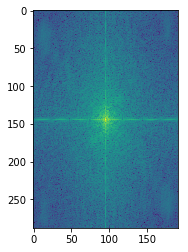

In [81]:
plt.imshow(magI)
plt.show()

In [ ]:
You can see that the most influential components of the frequency domain (brightest dots on the magnitude image) 
follow the geometric rotation of objects on the image. 
From this we may calculate the offset and perform an image rotation to correct eventual miss alignments.